https://www.kaggle.com/schirmerchad/bostonhoustingmlnd/kernels

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.
- MEDV: median value of owner-occupied homes

In [11]:
import pandas as pd
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time

from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split

In [12]:
df = pd.read_csv('housing.csv')

In [5]:
prices = df.MEDV

minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


## Data expected behaviour

- Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7? - As the number of rooms increases, in most of the cases, the Floor Area increases which in-turn increases the price of the house. So, a house that has an 'RM' value(number of rooms) of 6 will have a lesser worth than a home that has an 'RM' value of 7. ('RM vs 'Price' is a Positive Correlation)

- Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20? - Usually, high-class socities tend to have a higher home prices. So, as the percent of lower class workers decreases, the price of the house will increase. In this case, a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices worth more than a neighborhood that has an 'LSTAT' value of 20. ('LSTAT' vs 'Price' is a Negative Correlation)

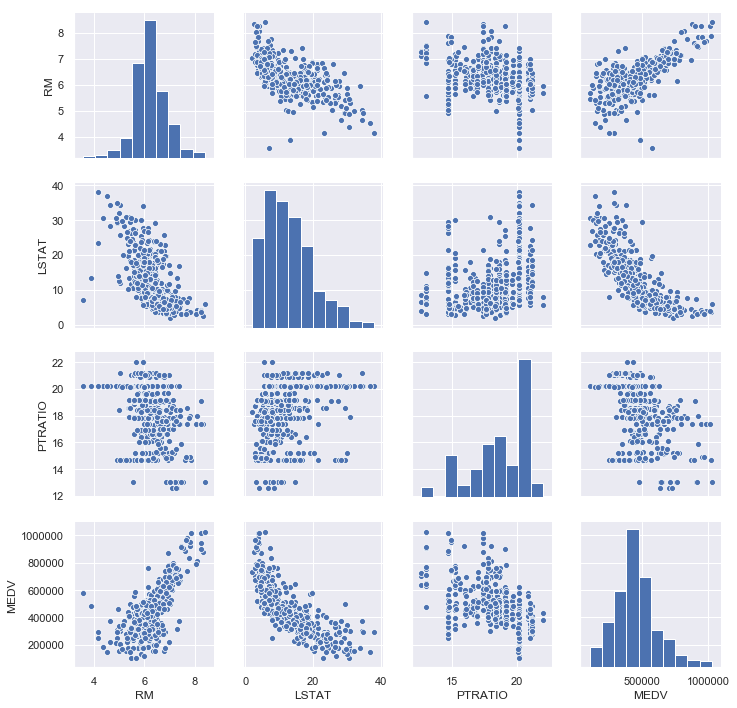

In [6]:
sns.pairplot(df)

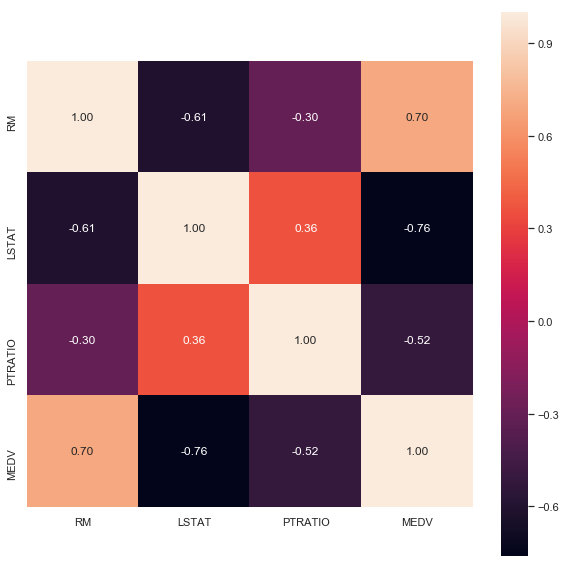

In [7]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()

Pareciera existir cierto grado de relacion lineal entre:
- RM y MEDV
- RM y PTRATIO

In [13]:
# Removing outliers removing 

#q = df['RM'].quantile(0.95)
#df = df[df['RM'] < q]

#q = df['LSTAT'].quantile(0.95)
#df = df[df['LSTAT'] < q]

# Manually removing outliers removing 

outliers = list(df[(df['RM'] < 4.5)].index)
df.drop(outliers, inplace=True)

In [14]:
#Saving dataset!
df.to_csv('housing-cleaned.csv')